# **We will use the technical characteristics of the player to know which group he fits into**

**Import the libraries we will use:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm #Color Map, make color map
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_samples, silhouette_score #Know the ideal number of clusters
from sklearn.ensemble import RandomForestClassifier 
from collections import Counter

In [2]:
data = pd.read_csv('../input/fifa19/data.csv')

In [3]:
data.shape

(18207, 89)

In [4]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Create a "for" to view each of the attributes:

In [5]:
#create indexes: will start at zero until the number of columns

for i, col in enumerate(data.columns):
    print(i, col)

0 Unnamed: 0
1 ID
2 Name
3 Age
4 Photo
5 Nationality
6 Flag
7 Overall
8 Potential
9 Club
10 Club Logo
11 Value
12 Wage
13 Special
14 Preferred Foot
15 International Reputation
16 Weak Foot
17 Skill Moves
18 Work Rate
19 Body Type
20 Real Face
21 Position
22 Jersey Number
23 Joined
24 Loaned From
25 Contract Valid Until
26 Height
27 Weight
28 LS
29 ST
30 RS
31 LW
32 LF
33 CF
34 RF
35 RW
36 LAM
37 CAM
38 RAM
39 LM
40 LCM
41 CM
42 RCM
43 RM
44 LWB
45 LDM
46 CDM
47 RDM
48 RWB
49 LB
50 LCB
51 CB
52 RCB
53 RB
54 Crossing
55 Finishing
56 HeadingAccuracy
57 ShortPassing
58 Volleys
59 Dribbling
60 Curve
61 FKAccuracy
62 LongPassing
63 BallControl
64 Acceleration
65 SprintSpeed
66 Agility
67 Reactions
68 Balance
69 ShotPower
70 Jumping
71 Stamina
72 Strength
73 LongShots
74 Aggression
75 Interceptions
76 Positioning
77 Vision
78 Penalties
79 Composure
80 Marking
81 StandingTackle
82 SlidingTackle
83 GKDiving
84 GKHandling
85 GKKicking
86 GKPositioning
87 GKReflexes
88 Release Clause


The 21 is the Position of the player. We will creat a new variable to get the Position, Height, Weight and the technical characteristics. We will get the 21, 26, 27 and it'll concatenate with the 54 until 82 because it is the technical parts:

In [6]:
cols = [21, 26, 27]
cols += range(54, 83)

Now let's creat a new data fram with the columns we will usw to make the clusters of the FIFA's players.

In [7]:
data = data.iloc[:, cols]

In [8]:
data.head()

,Position,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,RF,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,...,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,ST,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,...,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,LW,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,...,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
3,GK,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,...,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0
4,RCM,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,...,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0


In [9]:
#missing values:
data.isna().sum(axis = 0)

Position           60
Height             48
Weight             48
Crossing           48
Finishing          48
HeadingAccuracy    48
ShortPassing       48
Volleys            48
Dribbling          48
Curve              48
FKAccuracy         48
LongPassing        48
BallControl        48
Acceleration       48
SprintSpeed        48
Agility            48
Reactions          48
Balance            48
ShotPower          48
Jumping            48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
Composure          48
Marking            48
StandingTackle     48
SlidingTackle      48
dtype: int64

How we can see, there is 60 missing values in Position. We can see if the missing values of the others attributes have a relationship with the missing values for the Position:

In [10]:
len(data) - len(data.dropna())

60

In [11]:
(60 / len(data)) * 100

0.32954358213873786

We can see the 60 records that have no Position, also do not have the other records, so we will delete these 60 records with missing data

In [12]:
data = data.dropna()

In [13]:
data.isna().sum(axis = 0)

Position           0
Height             0
Weight             0
Crossing           0
Finishing          0
HeadingAccuracy    0
ShortPassing       0
Volleys            0
Dribbling          0
Curve              0
FKAccuracy         0
LongPassing        0
BallControl        0
Acceleration       0
SprintSpeed        0
Agility            0
Reactions          0
Balance            0
ShotPower          0
Jumping            0
Stamina            0
Strength           0
LongShots          0
Aggression         0
Interceptions      0
Positioning        0
Vision             0
Penalties          0
Composure          0
Marking            0
StandingTackle     0
SlidingTackle      0
dtype: int64

# **Analyzing the statistics:**

In [14]:
def hist_boxplot(feature):
  fig, ax = plt.subplots(1, 2)
  ax[0].hist(feature)
  ax[1].boxplot(feature)

In [15]:
data_stats = data.describe()
data_stats

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
count,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,...,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000
mean,49.738414,45.550229,52.300766,58.695432,42.912217,55.375158,47.176283,42.866038,52.721386,58.374828,...,47.113187,55.876068,46.702761,49.962198,53.407781,48.546371,58.651127,47.286053,47.701879,45.666336
std,18.364255,19.527445,17.381753,14.696075,17.695900,18.912224,18.396009,17.480034,15.325211,16.685643,...,19.263142,17.366534,20.697462,19.530469,14.146594,15.703113,11.437138,19.900450,21.663630,21.287961
min,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,...,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000
25%,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,...,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000
50%,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,...,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000
75%,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,...,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000
max,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,...,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000


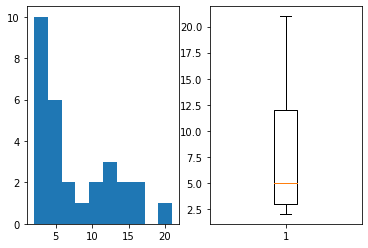

In [16]:
hist_boxplot(data_stats.loc['min'])

As we can see, most of the minimum values are more distributed up to the value 16, 17 for example, with a large gap between the 15 and the 20. On the side graph, it is clear that the values are more concentrated in the value 5,0.

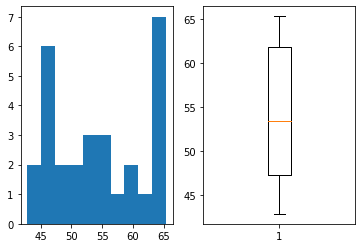

In [17]:
hist_boxplot(data_stats.loc['mean'])

Here we see that the values are more concentrated in the range between 50 and 55.

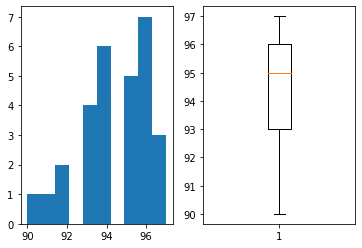

In [18]:
hist_boxplot(data_stats.loc['max'])

The histogram shows an interval between values 92 to approximately 93. As well as there is an interval between values 94 and 95 approximately. On the side we see a greater concentration at 95.

#  **Studying player height**

In [19]:
data['Height'].head()

0     5'7
1     6'2
2     5'9
3     6'4
4    5'11
Name: Height, dtype: object

I will convert the height to centimeters:

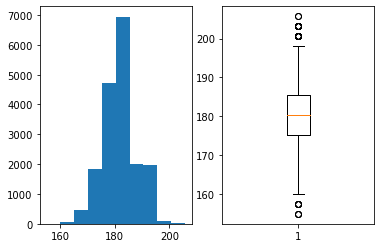

In [20]:
data['Height'] = data['Height'].str.split('\'')
data['Height'] = [30.48 * int(elem[0]) + 2.54 * int(elem[1]) for elem in data['Height']]
hist_boxplot(data['Height'])

# **Studying the weight of the players**

In [21]:
data['Weight'].head()

0    159lbs
1    183lbs
2    150lbs
3    168lbs
4    154lbs
Name: Weight, dtype: object

Let's convert to kilogram

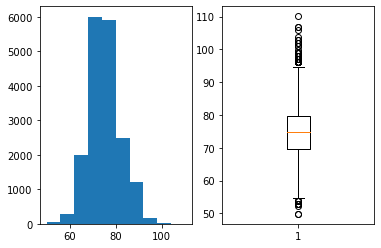

In [22]:
data['Weight'] = data['Weight'].str.split('l')
data['Weight'] = [int(elem[0]) * 0.453 for elem in data['Weight']]
hist_boxplot(data['Weight'])

# **Preparing the database:**

In [23]:
position = np.array(data['Position'])
np.unique(position, return_counts = True)

(array(['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LAM', 'LB', 'LCB', 'LCM',
        'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM',
        'RDM', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST'], dtype=object),
 array([ 958, 1778,  948,   74, 1394, 2025,   21, 1322,  648,  395,  243,
          15, 1095,  207,  381,   78,   21, 1291,  662,  391,  248,   16,
        1124,  203,  370,   87, 2152]))

Now we can delete the Position column from the database

In [24]:
data = data.drop(['Position'], axis = 1)
data.head()

,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,170.18,72.027,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,...,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,187.96,82.899,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,...,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,175.26,67.950,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,...,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
3,193.04,76.104,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,...,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0
4,180.34,69.762,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,...,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0


We will now use a scale so that the values are between 0 and 1, we will do this because we will use KMeans to perform the grouping, as we can see the height has higher values than the Heading Accuracy, which affects the model. With that we will leave them in closer values for better results.

In [25]:
scaler = MinMaxScaler()
train = scaler.fit_transform(data)

In [26]:
train

array([[0.3       , 0.36842105, 0.89772727, ..., 0.32967033, 0.28571429,
        0.26136364],
       [0.65      , 0.54887218, 0.89772727, ..., 0.27472527, 0.31868132,
        0.22727273],
       [0.4       , 0.30075188, 0.84090909, ..., 0.26373626, 0.24175824,
        0.34090909],
       ...,
       [0.35      , 0.28571429, 0.22727273, ..., 0.31868132, 0.12087912,
        0.09090909],
       [0.45      , 0.33082707, 0.44318182, ..., 0.18681319, 0.25274725,
        0.27272727],
       [0.45      , 0.4962406 , 0.40909091, ..., 0.40659341, 0.45054945,
        0.53409091]])

# Using the WCSS:

In [27]:
wcss = []
K = range(1, 12) #we have 11 players in a game
for k in K:
    KM = KMeans(n_clusters = k)
    KM = KM.fit(train)
    wcss.append(KM.inertia_)

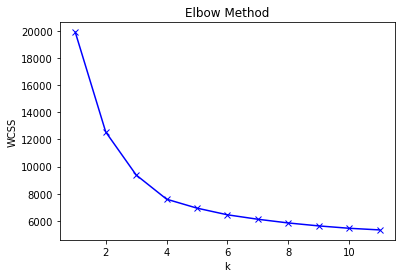

In [28]:
plt.plot(K, wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Elbow Method');

Following the rule of the elbow method, we will choose number 4.

Now we will use the PCA:

In [29]:
pca = PCA(n_components = 2)
data_pca = pca.fit_transform(train)
pca.explained_variance_ratio_
exp_var = [round(i, 1) for i in pca.explained_variance_ratio_ * 100]

Choosing the number of clusters with the silhouette method:

* Takes into account cohesion and separation
* Cohesion: measure of distance from one point to all other points in the same group
* Separation: measure the distance of a point with the points of the other clusters
* The coefficient is in the range of [-1, 1]
* The value -1 indicates that the cluster is bad (records in "wrong" groups)
* The value 0 indicates "indifference" (above the decision line, one cluster next to the other)
* The value 1 indicates that the clusters are far apart (the closer to 1, the better)

For n_clusters =  2  Average score:  0.4703559214248003
For n_clusters =  3  Average score:  0.28533699089281006
For n_clusters =  4  Average score:  0.2705397987148252
For n_clusters =  5  Average score:  0.2427679058421722
For n_clusters =  6  Average score:  0.21739489764383937
For n_clusters =  7  Average score:  0.2089161873439585
For n_clusters =  8  Average score:  0.20272510768843657
For n_clusters =  9  Average score:  0.18913688413827667
For n_clusters =  10  Average score:  0.1835940206865294
For n_clusters =  11  Average score:  0.17704031841557702


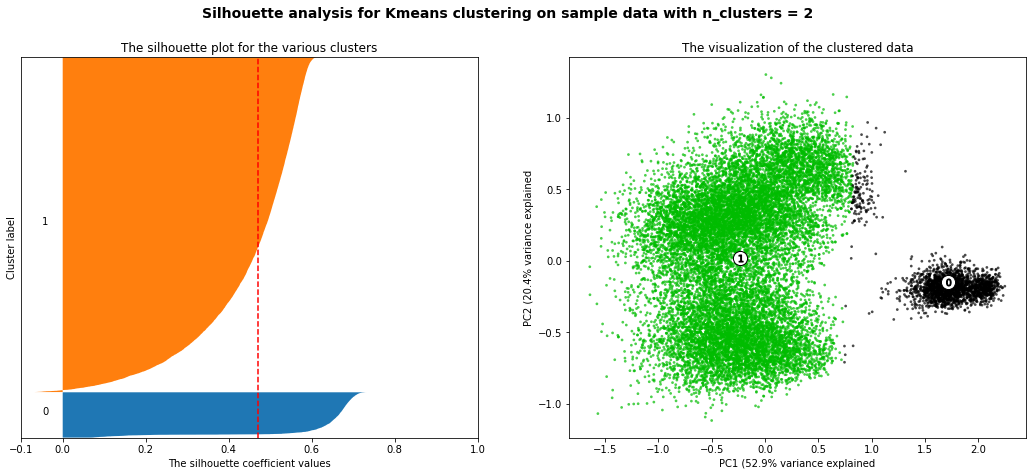

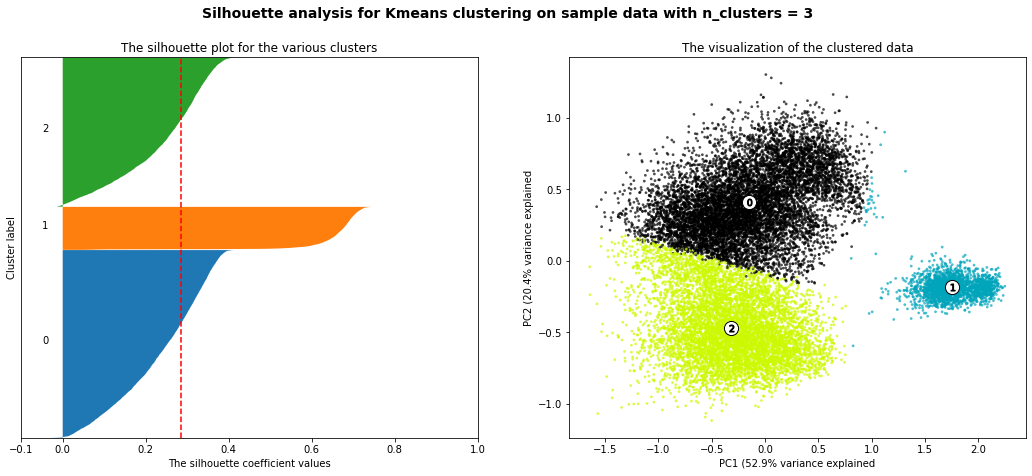

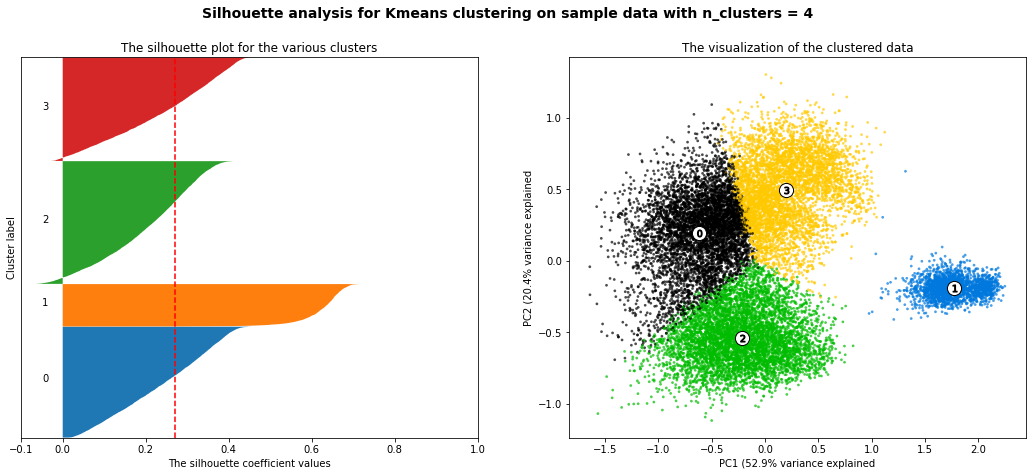

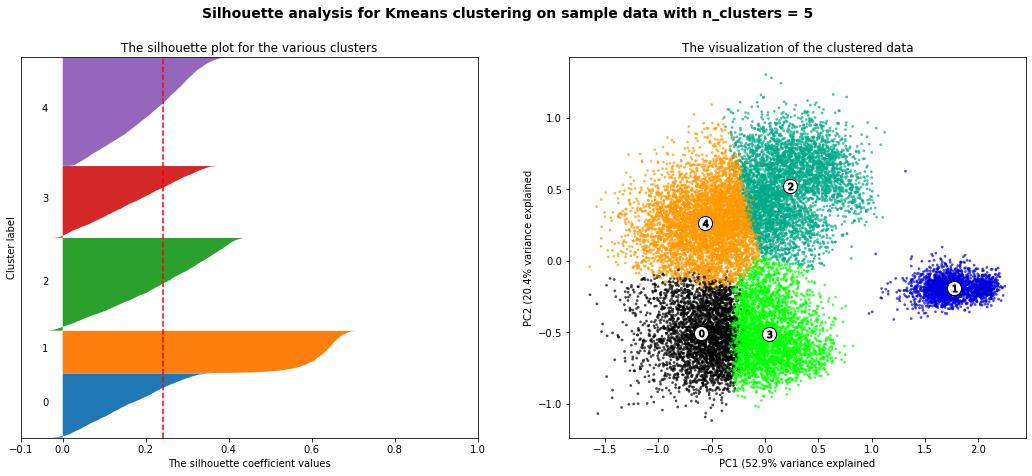

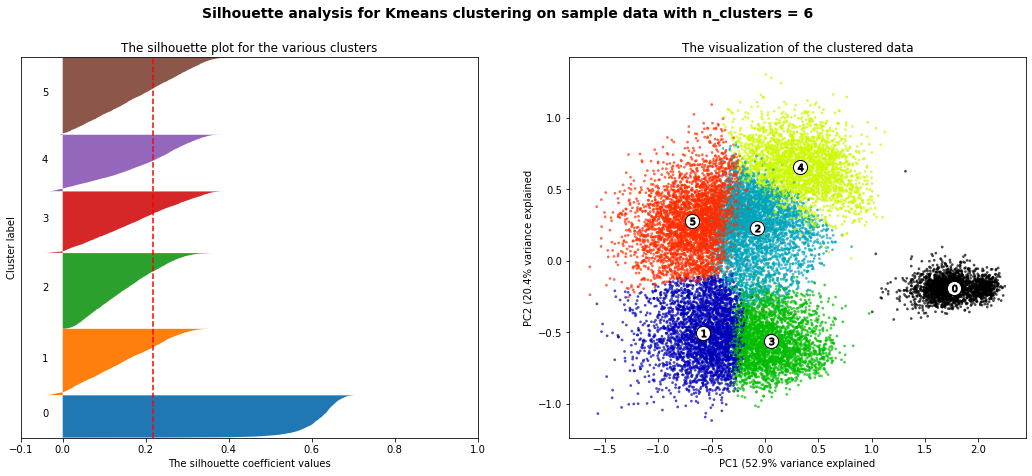

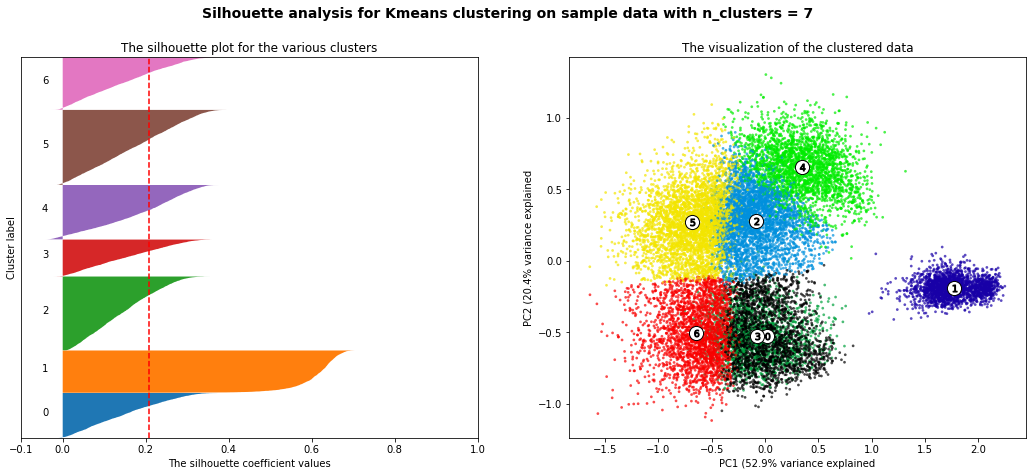

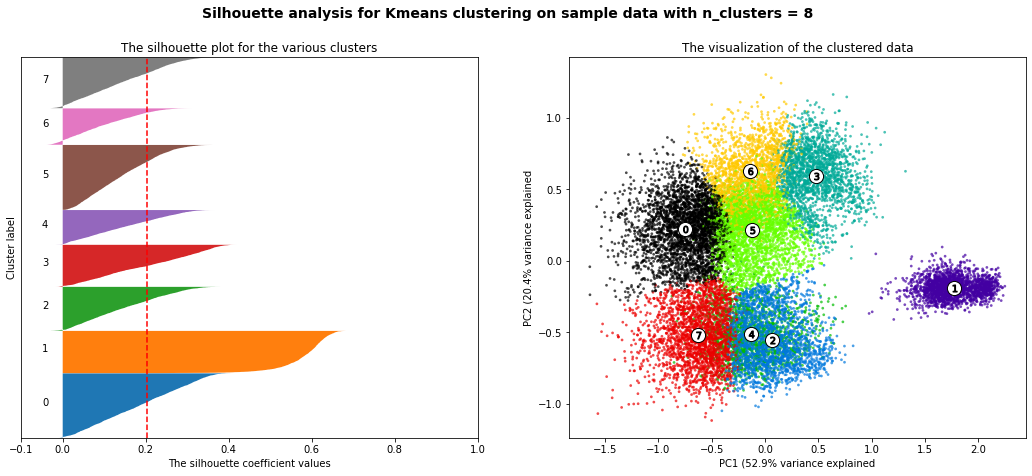

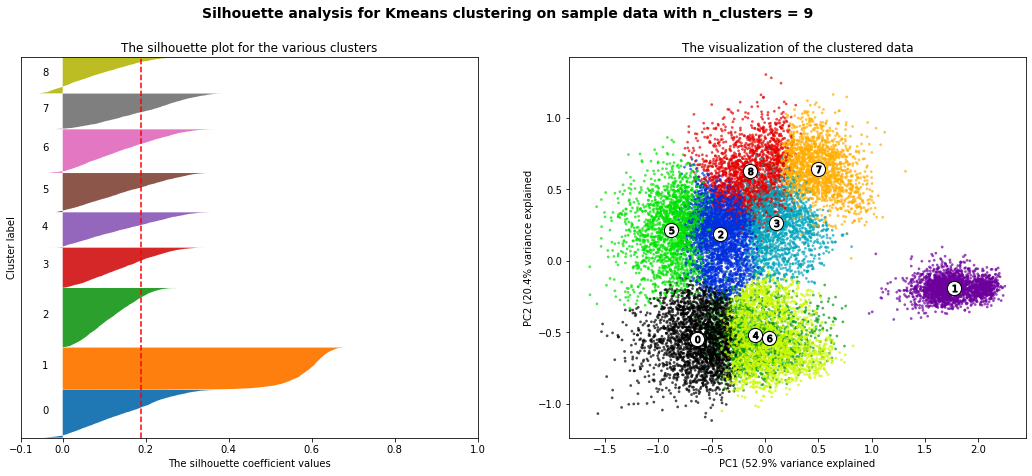

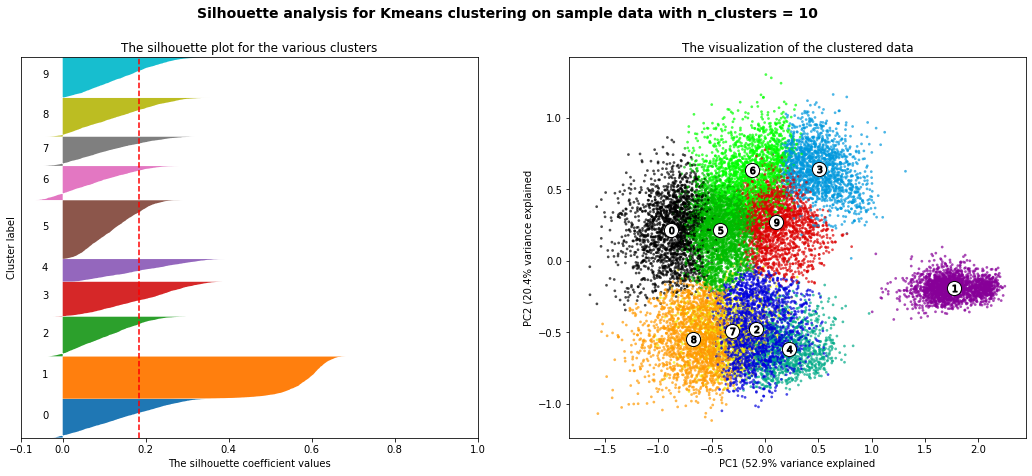

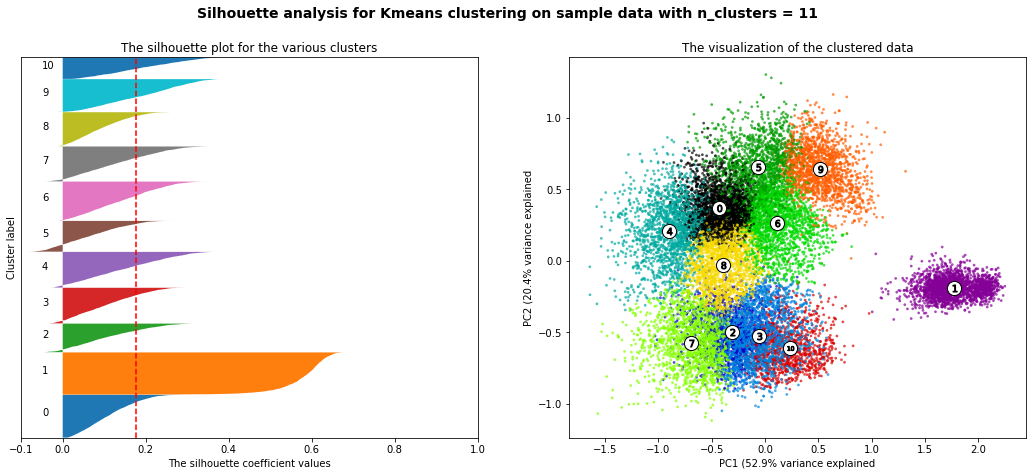

In [30]:
range_n_clusters = range(2, 12)
for n_clusters in range_n_clusters:
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  ax1.set_xlim([-0.1, 1])
  ax1.set_ylim([0, len(train) + (n_clusters + 1) * 10])

  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(train)
  #print(cluster_labels)
  #print(np.unique(cluster_labels))

  silhouette_avg = silhouette_score(train, cluster_labels)
  print("For n_clusters = ", n_clusters, " Average score: ", silhouette_avg)

  sample_silhouette_values = silhouette_samples(train, cluster_labels)
  #print(sample_silhouette_values)
  #print(len(sample_silhouette_values))

  y_lower = 10
  for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    #print(ith_cluster_silhouette_values.shape)

    size_cluster_i = ith_cluster_silhouette_values.shape[0]

    y_upper = y_lower + size_cluster_i
    #print(y_upper)
    
    ax1.fill_betweenx(np.arange(y_lower, y_upper), ith_cluster_silhouette_values)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

  ax1.set_title("The silhouette plot for the various clusters")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")   

  ax1.axvline(x = silhouette_avg, color = "red", linestyle = "--")

  ax1.set_yticks([])
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
  ax2.scatter(data_pca[:, 0], data_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

  centers = clusterer.cluster_centers_
  centers = pca.transform(centers)
  ax2.scatter(centers[:, 0], centers[:,1], marker='o', c='white', alpha=1, s=200, edgecolor='k')

  for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, s=50, edgecolor='k')

  ax2.set_title("The visualization of the clustered data")
  ax2.set_xlabel('PC1 (' + str(exp_var[0]) + '% variance explained')
  ax2.set_ylabel('PC2 (' + str(exp_var[1]) + '% variance explained')

  plt.suptitle(("Silhouette analysis for Kmeans clustering on sample data with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

All passed the red line (which is the silhouette), the greater the number of clusters, the closer the cluetrs are, with more mixtures occurring and the groups passing less and less than the red line. The more you cross the red line, the more distributed the group is. For visualizations, the ideal number of clauster would be with the number 4 or 5. As we saw earlier, using the elbow method, the best was n_clusters = 4.

# **K - Means**

In [31]:
km = KMeans(n_clusters = 4, n_init = 100, random_state = 0)
km.fit(train)

KMeans(n_clusters=4, n_init=100, random_state=0)

In [32]:
print(km.cluster_centers_) #it shows the position of the centers

[[0.56060637 0.44640055 0.44556489 0.31345039 0.61720834 0.57804331
  0.31986817 0.47157383 0.3477813  0.34149171 0.49722766 0.53949978
  0.57396786 0.59137217 0.52088697 0.50157669 0.54079623 0.48261678
  0.65371676 0.62802895 0.66410909 0.34307453 0.62429732 0.65025034
  0.39646964 0.39140862 0.4076315  0.55579094 0.63782531 0.68148914
  0.67068804]
 [0.4702277  0.38306089 0.55758665 0.64979483 0.55682246 0.62994549
  0.5974845  0.66473004 0.55782011 0.50135552 0.50793039 0.66486997
  0.7148655  0.72122761 0.69858987 0.52853735 0.67322804 0.66915556
  0.60484934 0.61189376 0.550214   0.60537391 0.44944603 0.2943701
  0.65406756 0.57683371 0.6245742  0.61149678 0.3296233  0.30435478
  0.27959098]
 [0.47892756 0.39656385 0.66675575 0.55082087 0.59985366 0.73030913
  0.55219103 0.67471247 0.62201103 0.57782556 0.67823545 0.70536632
  0.67361629 0.67696994 0.68511346 0.61711634 0.67299389 0.69250346
  0.65909454 0.7391502  0.62936971 0.6289043  0.67715137 0.68546302
  0.63368636 0.642445

In [33]:
position[2]

'LW'

We will now make a comparison and see if the position of the player with the group in which he was harassed.

In [34]:
group = km.labels_ #will return in these records to which group it belongs (km.labels_)
comp = []
for i in range(0, len(position)):
    ele = tuple((position[i], group[i]))
    comp.append(ele)

In [35]:
comp[0:4]

[('RF', 1), ('ST', 1), ('LW', 1), ('GK', 3)]

In [36]:
#how many records per group
count = Counter(comp)
count

Counter({('RF', 1): 12,
         ('ST', 1): 2068,
         ('LW', 1): 330,
         ('GK', 3): 2024,
         ('RCM', 2): 324,
         ('LF', 1): 11,
         ('RS', 2): 11,
         ('RCB', 2): 101,
         ('LCM', 2): 309,
         ('CB', 2): 155,
         ('LDM', 2): 189,
         ('ST', 2): 73,
         ('CAM', 2): 280,
         ('CDM', 2): 560,
         ('LS', 2): 15,
         ('LCB', 2): 114,
         ('RM', 1): 803,
         ('RM', 2): 285,
         ('LAM', 2): 3,
         ('LW', 2): 49,
         ('LM', 1): 805,
         ('LB', 2): 720,
         ('LS', 1): 192,
         ('LCB', 0): 533,
         ('RDM', 2): 193,
         ('RW', 2): 45,
         ('LM', 2): 257,
         ('CM', 2): 846,
         ('RB', 2): 664,
         ('CB', 0): 1621,
         ('CAM', 1): 660,
         ('LF', 2): 4,
         ('RW', 1): 324,
         ('RCB', 0): 560,
         ('RS', 1): 191,
         ('RAM', 2): 6,
         ('LCM', 1): 55,
         ('CF', 1): 68,
         ('LAM', 1): 18,
         ('CF', 2): 6,


In [37]:
comp = pd.DataFrame({'Position': [i[0] for i in list(count.keys())],
                     'Group': [i[1] for i in list(count.keys())],
                     'Numbers': list(count.values())})

In [38]:
comp.head()

,Position,Group,Numbers
0,RF,1,12
1,ST,1,2068
2,LW,1,330
3,GK,3,2024
4,RCM,2,324


In [39]:
comp.shape

(77, 3)

In [40]:
#ordering groups according to their position:
comp = comp.sort_values(['Position', 'Group'])
comp.head()

,Position,Group,Numbers
64,CAM,0,18
30,CAM,1,660
12,CAM,2,280
29,CB,0,1621
66,CB,1,1


In [41]:
#analyzing in percentage
comp_per = pd.DataFrame()
pos = comp['Position'].unique()
pos

array(['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LAM', 'LB', 'LCB', 'LCM',
       'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM',
       'RDM', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST'], dtype=object)

In [42]:
for p in pos:
    comp_p = comp[comp['Position'] == p] 
    sum_N = sum(comp_p['Numbers'])
    comp_p['Numbers'] = comp_p['Numbers'] / sum_N
    comp_per = comp_per.append(comp_p)
comp_per = comp_per.sort_values(['Group', 'Numbers', 'Position'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [43]:
comp_per.head()

,Position,Group,Numbers
70,GK,0,0.000494
68,RW,0,0.002703
63,ST,0,0.004647
69,RS,0,0.004926
73,LW,0,0.005249


In [44]:
comp_per.tail()

,Position,Group,Numbers
4,RCM,2,0.828645
76,ST,3,0.000465
74,CB,3,0.000562
75,RB,3,0.000775
3,GK,3,0.999506


In [45]:
#let's create a bar graph with the percentage of frequencies for each group:

comp_barplot = pd.DataFrame({'Position': sum([[ele] * 4 for ele in np.unique(position)], []),
                             'Group': sum([['0', '1', '2', '3'] * len(np.unique(position))], []),
                             'Numbers': [0] * 4 * len(np.unique(position))})

In [46]:
comp_barplot.head(10)

,Position,Group,Numbers
0,CAM,0,0
1,CAM,1,0
2,CAM,2,0
3,CAM,3,0
4,CB,0,0
5,CB,1,0
6,CB,2,0
7,CB,3,0
8,CDM,0,0
9,CDM,1,0


In [47]:
#we will now find the value of 'Numbers':

for row in range(0, len(comp_barplot)):
    pos = comp_barplot.iloc[row, 0]
    gro = int(comp_barplot.iloc[row, 1])
    reg = comp_per.loc[(comp_per['Position'] == pos) & (comp_per['Group'] == gro), :]
if len(reg) > 0:
    comp_barplot.iloc[row, 2] = reg['Numbers'].values

In [48]:
comp_barplot.head()

,Position,Group,Numbers
0,CAM,0,0.0
1,CAM,1,0.0
2,CAM,2,0.0
3,CAM,3,0.0
4,CB,0,0.0


In [49]:
comp_barplot.tail()

,Position,Group,Numbers
103,RWB,3,0.000000
104,ST,0,0.000000
105,ST,1,0.000000
106,ST,2,0.000000
107,ST,3,0.000465


In [50]:
counter1 = Counter(comp_per[comp_per['Numbers'] >= 0.5]['Group'])
counter1

Counter({0: 3, 1: 13, 2: 10, 3: 1})

In [51]:
#for security and warranty, we will leave this ordering code
counter1 = dict(sorted(counter1.items(), key = lambda x: x[0]))
counter1

{0: 3, 1: 13, 2: 10, 3: 1}

In [52]:
x = [str(ele) for ele in list(counter1.keys())]
x

['0', '1', '2', '3']

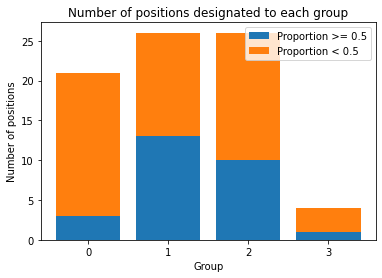

In [53]:
p1 = plt.bar(x, counter1.values())
counter2 = Counter(comp_per[comp_per['Numbers'] < 0.5]['Group'])
counter2 = dict(sorted(counter2.items(), key = lambda x: x[0]))
x = [str(ele) for ele in list(counter2.keys())]

p2 = plt.bar(x, counter2.values(), bottom=list(counter1.values()))
plt.title('Number of positions designated to each group')
plt.xlabel('Group')
plt.ylabel('Number of positions')
plt.legend((p1[0], p2[0]), ('Proportion >= 0.5', 'Proportion < 0.5'))

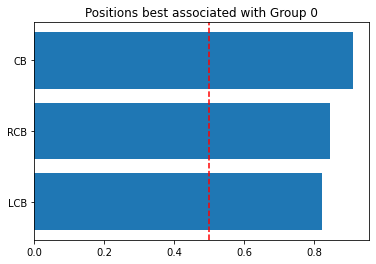

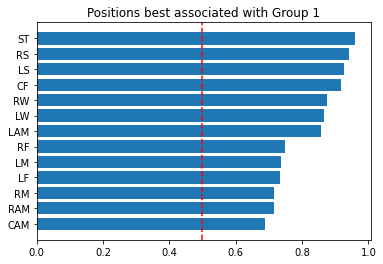

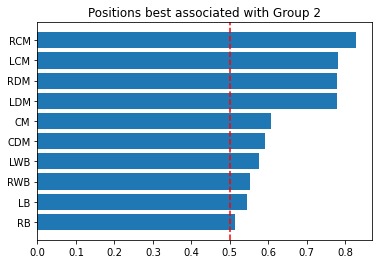

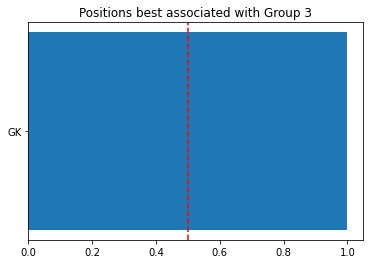

In [54]:
#most frequent positions for each group:
for i in range(4):
    g = comp_per[(comp_per['Group'] == i) & (comp_per['Numbers'] >= 0.5)][['Position', 'Numbers']]
    g = g.sort_values(by = 'Numbers')
    plt.barh(g['Position'], g['Numbers'])
    plt.axvline(0.5, color = 'r', linestyle = '--')
    plt.title('Positions best associated with Group ' + str(i))
    plt.show()

# **Random Forest**

In [55]:
rf = RandomForestClassifier()
rf.fit(train, group)

RandomForestClassifier()

In [56]:
importances = rf.feature_importances_
importances

array([0.00245284, 0.00312051, 0.02181768, 0.0725378 , 0.03014407,
       0.01170001, 0.04584459, 0.05441722, 0.0433464 , 0.02688922,
       0.01460121, 0.03440252, 0.0039983 , 0.0040641 , 0.00814706,
       0.00515453, 0.00523889, 0.01853219, 0.00294934, 0.0158735 ,
       0.00368321, 0.07909291, 0.022924  , 0.08536184, 0.05332212,
       0.02634916, 0.01008154, 0.00694617, 0.05655272, 0.13679654,
       0.09365781])

In [57]:
features = data.columns
imp = pd.DataFrame({'Features': features, 'Importance': importances})
imp.head()

,Features,Importance
0,Height,0.002453
1,Weight,0.003121
2,Crossing,0.021818
3,Finishing,0.072538
4,HeadingAccuracy,0.030144


In [58]:
#the 5 most important features

imp = imp.sort_values(by = 'Importance', ascending = False)
imp.head()

,Features,Importance
29,StandingTackle,0.136797
30,SlidingTackle,0.093658
23,Interceptions,0.085362
21,LongShots,0.079093
3,Finishing,0.072538


In [59]:
#the 5 least important features

imp.tail()

,Features,Importance
12,Acceleration,0.003998
20,Strength,0.003683
1,Weight,0.003121
18,Jumping,0.002949
0,Height,0.002453


In [60]:
#accumulated sum

imp['Sum Importance'] = imp['Importance'].cumsum()
imp = imp.sort_values(by = 'Importance')
imp.head()

,Features,Importance,Sum Importance
0,Height,0.002453,1.000000
18,Jumping,0.002949,0.997547
1,Weight,0.003121,0.994598
20,Strength,0.003683,0.991477
12,Acceleration,0.003998,0.987794


In [61]:
imp.tail()

,Features,Importance,Sum Importance
3,Finishing,0.072538,0.467447
21,LongShots,0.079093,0.394909
23,Interceptions,0.085362,0.315816
30,SlidingTackle,0.093658,0.230454
29,StandingTackle,0.136797,0.136797


In this accumulated sum it shows that Interceptions and StandingTackle represent 21% of the importance of all characteristics. That is, these characteristics added together represent 44% of the importance.

Text(0.5, 1.0, 'Feature importance in group assignment')

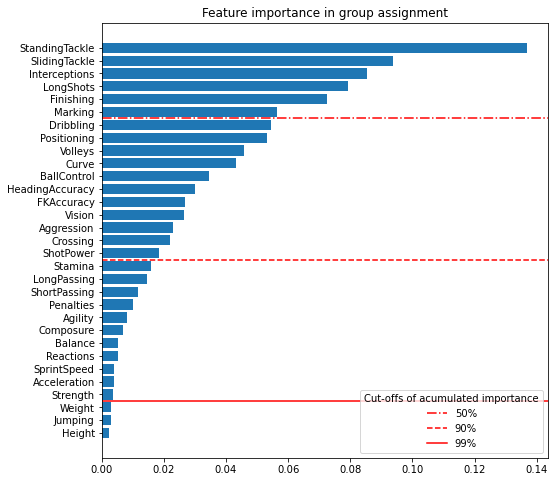

In [62]:
plt.figure(figsize=(8,8))
plt.barh(imp['Features'], imp['Importance'])
l1 = plt.axhline(len(imp) - (len(imp['Features'][imp['Sum Importance'] < 0.50]) + 1.5), linestyle='-.', color = 'r')
l2 = plt.axhline(len(imp) - (len(imp['Features'][imp['Sum Importance'] < 0.90]) + 1.5), linestyle='--', color = 'r')
l3 = plt.axhline(len(imp) - (len(imp['Features'][imp['Sum Importance'] < 0.99]) + 1.5), linestyle='-', color = 'r')
plt.legend(title = 'Cut-offs of acumulated importance', handles=(l1, l2, l3), labels = ('50%', '90%', '99%'))
plt.title('Feature importance in group assignment')

# **Conclusions:**
These analyzes give us the conclusion that we can separate the players into 4 groups. And it also allows us to be aware of the most important characteristics for the realization of the grouping and in this way to be able to improve efficiency. You can also have the result if that player is better in that position, considering his characteristics or if by them, it is better to be allocated to other groups, where he can show better performance. **Enables the best allocation of the player.**

# **Using Random Forest for classification:**

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

X_train, X_test, Y_train, Y_test = train_test_split(train, group, test_size = 0.2)

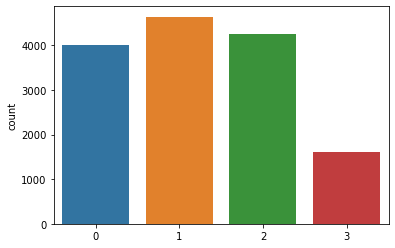

In [64]:
import seaborn as sns

sns.countplot(Y_train)

In [65]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

pred = rf.predict(X_test)
accuracy_score(pred, Y_test)

0.971900826446281

In [66]:
cm = confusion_matrix(pred, Y_test)
cm

array([[ 936,    6,   33,    0],
       [   5, 1185,   27,    0],
       [  19,   12,  988,    0],
       [   0,    0,    0,  419]])

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


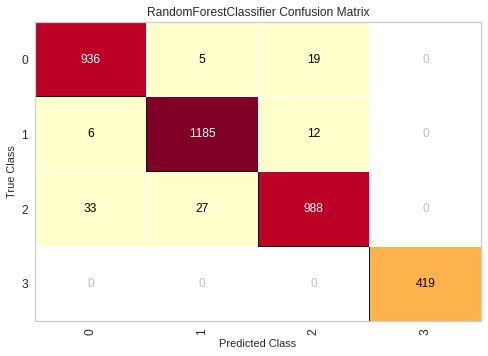

In [67]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix = ConfusionMatrix(rf)
confusion_matrix.fit(X_train, Y_train)
confusion_matrix.score(X_test, Y_test)
confusion_matrix.show();

# **Predicting the player**

A new one has entered and now a simulation of which group and e will be allocated:

In [68]:
new = X_test[0]
new

array([0.3       , 0.33082707, 0.65909091, 0.65591398, 0.46666667,
       0.73255814, 0.73255814, 0.76344086, 0.67045455, 0.67032967,
       0.69047619, 0.75824176, 0.76470588, 0.72619048, 0.75609756,
       0.66666667, 0.8625    , 0.8172043 , 0.5       , 0.78571429,
       0.4625    , 0.78021978, 0.45238095, 0.37078652, 0.69892473,
       0.72619048, 0.56321839, 0.74193548, 0.15384615, 0.26373626,
       0.20454545])

In [69]:
new = new.reshape(1, -1)
#will return which group it belongs to
rf.predict(new) 

array([1], dtype=int32)

In [70]:
#using probability of belonging to each group
rf.predict_proba(new)

array([[0., 1., 0., 0.]])